In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# load data
train_data = pd.read_csv('./data_format1/train_format1.csv')
test_data = pd.read_csv('./data_format1/test_format1.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


user_id, merchant_id, label

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


user_id, merchant_id, prob

In [5]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


user_id, age_range, gender

In [6]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


user_id, item_id, cat_id, seller_id, brand_id, time_stamp, action_type

In [7]:
train_data.head(10)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0
5,362112,2618,0
6,34944,2051,0
7,231552,3828,1
8,231552,2124,0
9,232320,1168,0


In [8]:
test_data.head(10)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN
5,33408,98,NaN
6,230016,1742,NaN
7,164736,598,NaN
8,164736,1963,NaN
9,164736,2634,NaN


In [9]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [10]:
user_log.head(10)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0
5,328862,623866,1271,2882,2661.0,829,0
6,328862,542871,1467,2882,2661.0,829,0
7,328862,536347,1095,883,1647.0,829,0
8,328862,364513,1271,2882,2661.0,829,0
9,328862,575153,1271,2882,2661.0,829,0


In [11]:
# age missing ratio
(user_info.shape[0] - user_info['age_range'].count()) / user_info.shape[0]

0.005226677982884221

In [12]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [13]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


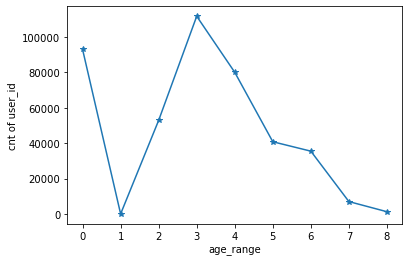

In [14]:
plt.figure()
plt.plot(user_info.groupby(['age_range'])[['user_id']].count(), marker = "*")
plt.xlabel("age_range")
plt.ylabel("cnt of user_id")
plt.show()

In [15]:
# gender missing ratio
(user_info.shape[0] - user_info['gender'].count()) / user_info.shape[0]

0.01517316170403376

In [16]:
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [17]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


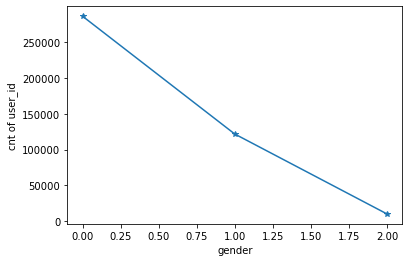

In [18]:
# 0 for female, 1 for male, 2 and null for unknown
plt.figure()
plt.plot(user_info.groupby(['gender'])[['user_id']].count(), marker = "*")
plt.xlabel("gender")
plt.ylabel("cnt of user_id")
plt.show()

In [19]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

In [20]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [21]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [22]:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,5.483432e+07,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,4.153348e+03,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,2.397679e+03,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2.027000e+03,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4.065000e+03,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6.196000e+03,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8.477000e+03,1.112000e+03,3.000000e+00


label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

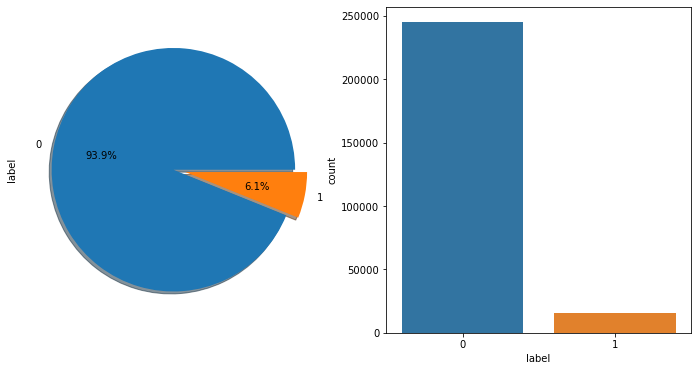

In [23]:
# label distribution, 0:non-repeat buyers, 1:repeat buyers
label_gp = train_data.groupby('label')['user_id'].count()
print(label_gp)
_,axe = plt.subplots(1, 2, figsize = (12,6))
train_data.label.value_counts().plot(kind = 'pie',autopct = '%1.1f%%', shadow = True,
                                     explode = [0,0.1], ax = axe[0])
sns.countplot('label', data = train_data, ax = axe[1],)

unbalanced data

Top 5 stores
Store	Buying times
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


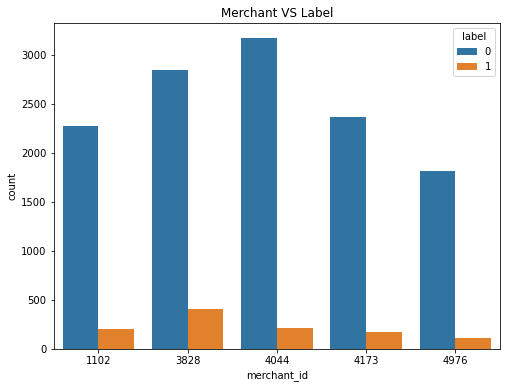

In [24]:
# relation between stores and repeating buys
print('Top 5 stores\nStore\tBuying times')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5'] == 1]
plt.figure(figsize = (8, 6))
plt.title('Merchant VS Label')
ax = sns.countplot('merchant_id', hue = 'label', data = train_data_merchant)
for p in ax.patches:
    height = p.get_height()

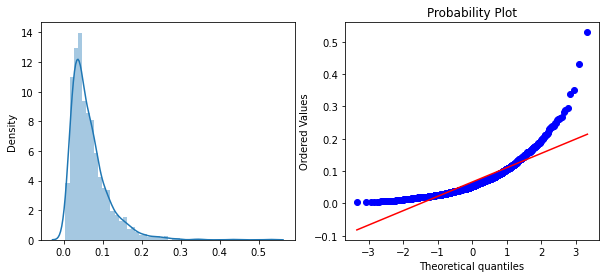

In [25]:
# probability distribution of repeating buys at stores
merchant_repeat_buy = [rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 
plt.figure(figsize = (10, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(merchant_repeat_buy)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(merchant_repeat_buy, plot = plt)

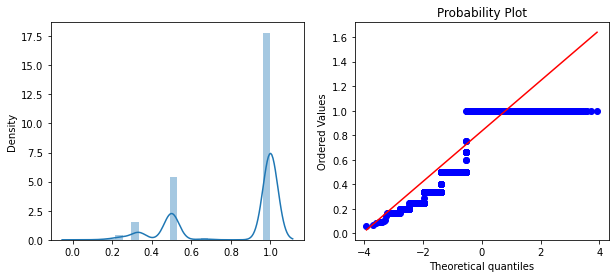

In [26]:
# distribution of users who made repeating buys
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize = (10, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(user_repeat_buy)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(user_repeat_buy, plot = plt)

In [27]:
train_data_user_info = train_data.merge(user_info, on = ['user_id'], how = 'left')

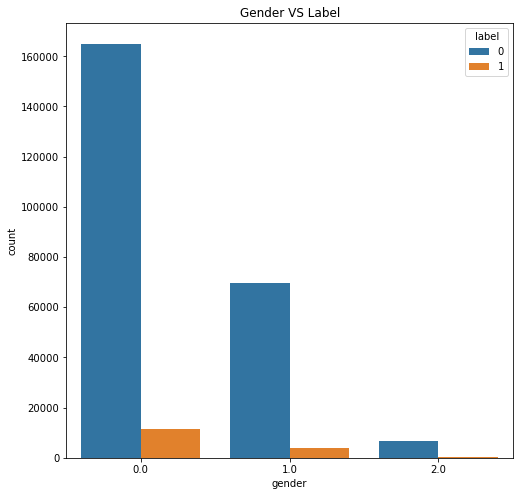

In [28]:
# relation between gender and repeating buys
plt.figure(figsize = (8, 8))
plt.title('Gender VS Label')
ax = sns.countplot('gender', hue = 'label', data = train_data_user_info)
for p in ax.patches:
    height = p.get_height()

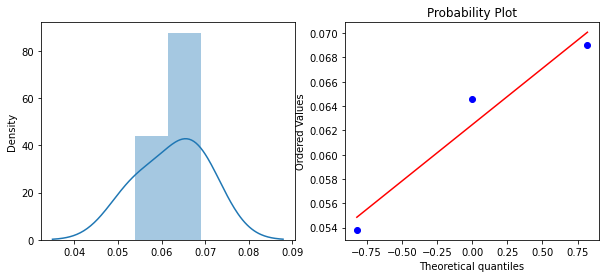

In [29]:
# histplot of distribution of repeating buys with respect to gender
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 

plt.figure(figsize = (10, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot = plt)

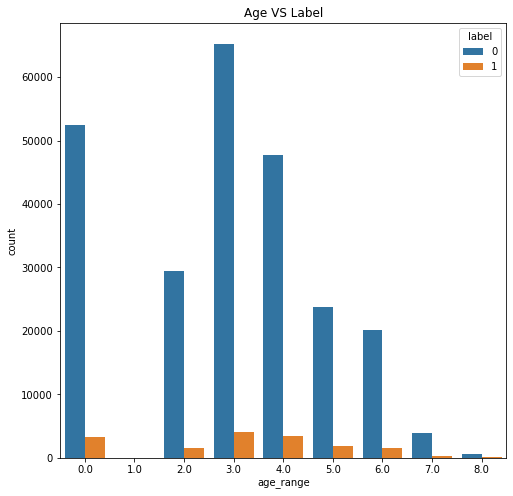

In [30]:
# relation between age and repeating buys
plt.figure(figsize = (8, 8))
plt.title('Age VS Label')
ax = sns.countplot('age_range', hue = 'label', data = train_data_user_info)

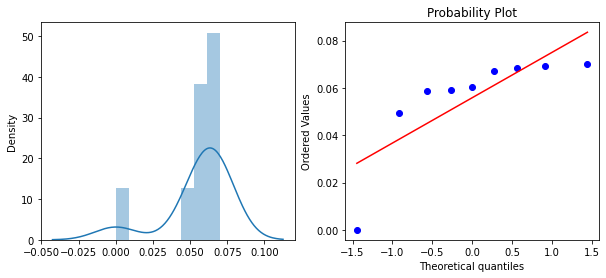

In [31]:
# histplot of distribution of repeating buys with respect to age range
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize = (10, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot = plt)